In [16]:
import numpy as np
import pandas as pd

In [17]:
#train_data
data_tr = pd.read_csv('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\train.csv')

dic = {'figurative':1, 'irony':2, 'regular':3, 'sarcasm':4}
data_tr['state'] = data_tr['class'].map(dic)
data_tr['state'] = data_tr['state'].astype('category').cat.codes
data_tr['sar'] = np.where(data_tr['class'] == 'sarcasm', 1, 0)
data_tr.to_csv('sar_tr.csv')
data_tr.head()

,tweets,class,state,sar
0,Be aware dirty step to get money #staylight ...,figurative,0,0
1,# for #people who don't understand #diy #arta...,figurative,0,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,0
3,@wilw Why do I get the feeling you like games? #,figurative,0,0
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,0


In [18]:
#test_data
data_ts = pd.read_csv('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\test.csv').fillna(' ')

data_ts['state'] = data_ts['class'].map(dic)
data_ts['state'] = data_ts['state'].astype('category').cat.codes
data_ts['sar'] = np.where(data_ts['class'] == 'sarcasm', 1, 0)
data_ts.to_csv('sar_ts.csv')
data_ts.head()

,tweets,class,state,sar
0,no one ever predicted this was going to happen...,figurative,0,0
1,@Stooshie its as closely related as Andrews or...,figurative,0,0
2,I find it ironic when Vegans say they love foo...,figurative,0,0
3,Quick rt that throwing money vine I've not see...,figurative,0,0
4,"yep, keep adding me to your #devops lists.... ...",figurative,0,0


In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


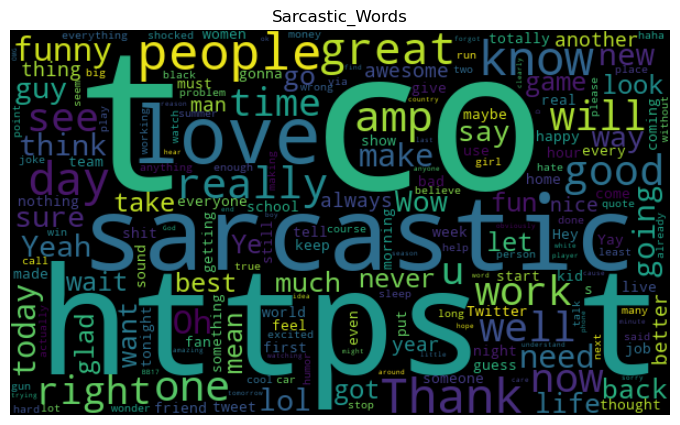

In [20]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
sar_text = ' '.join( 
    data_tr['tweets'][data_tr['sar'] == 1].tolist()) 
wordcloud = WordCloud(width=600, height=350, 
                      background_color='black').generate(sar_text) 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic_Words') 
plt.show() 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [22]:
#pipeline_creation
tf_idf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_features = 90000)
#x_tr = txt.fit_transform(data_tr['tweets'])
#x_ts = txt.transform(data_ts['tweets'])
x_tr, x_ts, y_tr, y_ts = train_test_split(data_tr['tweets'], data_tr['sar'])

logit = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', random_state = 55)
pipe = Pipeline([('tf_idf', tf_idf), ('logit', logit)])
pipe.fit(x_tr, y_tr)

Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=90000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logit',
                 LogisticRegression(C=1, penalty='l1', random_state=55,
                                    solver='liblinear'))])

In [23]:
#prediction
y_pred = pipe.predict(x_ts)

In [30]:
#model_performance
acc = accuracy_score(y_ts, y_pred)
clas = classification_report(y_ts, y_pred)
cm = confusion_matrix(y_ts, y_pred)

print('accuracy: \n', round(acc,3)*100, '%')
print("report: \n",clas)
print("confusion_matrix: \n", cm)

accuracy: 
 86.5 %
report: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     15196
           1       0.66      0.95      0.78      5156

    accuracy                           0.87     20352
   macro avg       0.82      0.89      0.84     20352
weighted avg       0.90      0.87      0.87     20352

confusion_matrix: 
 [[12709  2487]
 [  253  4903]]


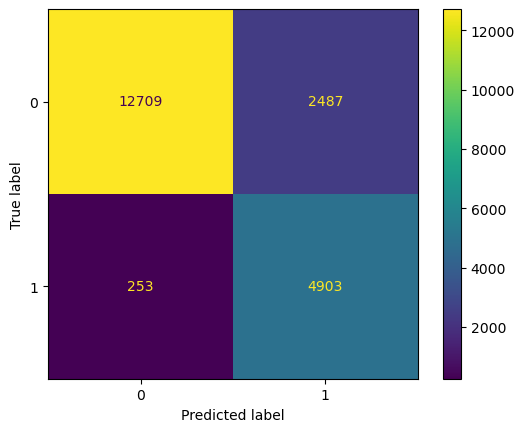

In [25]:
#visual_representation
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_disp.plot()
plt.show()

In [26]:
#samp_tf_voc
txt = data_ts['tweets'].head().tolist()
tf = TfidfVectorizer(analyzer = 'word')
tf_fit = tf.fit(txt)
tf_tr = tf_fit.transform(txt)
ind = tf.vocabulary_
print('word index\n', ind)

word index
 {'no': 31, 'one': 33, 'ever': 11, 'predicted': 35, 'this': 47, 'was': 54, 'going': 15, 'to': 50, 'happen': 16, 'sarcasm': 39, 'https': 17, 'co': 7, 'eejsozdykc': 9, 'stooshie': 43, 'its': 23, 'as': 4, 'closely': 6, 'related': 37, 'andrews': 3, 'original': 34, 'claim': 5, 'that': 44, 'evolution': 12, 'and': 2, 'entropy': 10, 'find': 13, 'it': 22, 'ironic': 20, 'when': 55, 'vegans': 52, 'say': 40, 'they': 46, 'love': 28, 'food': 14, 'irony': 21, 'quick': 36, 'rt': 38, 'throwing': 48, 'money': 30, 'vine': 53, 've': 51, 'not': 32, 'seen': 42, '30': 0, 'times': 49, 'in': 18, 'the': 45, 'last': 26, 'seconds': 41, 'yep': 56, 'keep': 25, 'adding': 1, 'me': 29, 'your': 57, 'devops': 8, 'lists': 27, 'justsaying': 24, 'infosec': 19}


In [27]:
#samp_tf-idf_matrix
idf = tf.idf_
print('idf values\n', dict(zip(tf_fit.get_feature_names_out(), idf)))
print("\nSamp tf-idf matrix \n ", tf_tr.toarray())

idf values
 {'30': 2.09861228866811, 'adding': 2.09861228866811, 'and': 2.09861228866811, 'andrews': 2.09861228866811, 'as': 2.09861228866811, 'claim': 2.09861228866811, 'closely': 2.09861228866811, 'co': 2.09861228866811, 'devops': 2.09861228866811, 'eejsozdykc': 2.09861228866811, 'entropy': 2.09861228866811, 'ever': 2.09861228866811, 'evolution': 2.09861228866811, 'find': 2.09861228866811, 'food': 2.09861228866811, 'going': 2.09861228866811, 'happen': 2.09861228866811, 'https': 2.09861228866811, 'in': 2.09861228866811, 'infosec': 2.09861228866811, 'ironic': 2.09861228866811, 'irony': 1.6931471805599454, 'it': 1.6931471805599454, 'its': 2.09861228866811, 'justsaying': 2.09861228866811, 'keep': 2.09861228866811, 'last': 2.09861228866811, 'lists': 2.09861228866811, 'love': 2.09861228866811, 'me': 2.09861228866811, 'money': 2.09861228866811, 'no': 2.09861228866811, 'not': 2.09861228866811, 'one': 2.09861228866811, 'original': 2.09861228866811, 'predicted': 2.09861228866811, 'quick': 2.09